In [1]:
from amftrack.pipeline.development.high_mag_videos.kymo_class import *
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
%matplotlib widget
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    clean_degree_4,
)
import scipy


/gpfs/home6/svstaalduine/AMF_project/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-03-17 16:45:46.545566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 16:45:46.724284: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home6/svstaalduine/.local/lib/python3.9/site-packages/cv2/../../lib64:/sw/arch/Centos8/EB_production/2021/software/ZeroMQ/4.3.4-GCCcore-10.3.0/lib:

Found an xlsx file, using that data
Analysing FLUO video of 50.0X zoom, with 20.0 fps
Using image selection 0 to 600
Succesfully extracted the skeleton. Did you know there is a skeleton inside inside you right now?

 To work with individual edges, here is a list of their indices:
edge 0, (1, 0)


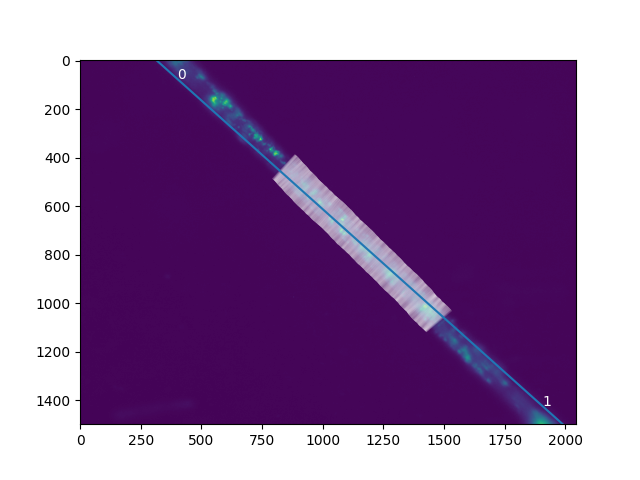

Just saved the extracted edges


In [2]:
img_address = '/gpfs/scratch1/shared/amftrackflow/20230126_528/20230126_Plate528_03/'

test_video = Kymo_video_analysis(img_address, logging=True, vid_type=None, fps=None, binning=None, filter_step=80)
edge_list = test_video.edge_objects

print('\n To work with individual edges, here is a list of their indices:')
for i, edge in enumerate(edge_list):
    print('edge {}, {}'.format(i, edge.edge_name))
    
target_length = int(2.5*test_video.magnification)

test_video.plot_extraction_img(target_length=target_length, save_img=True)
edges_total = test_video.edge_objects

Extracting edge images...


100%|███████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.20it/s]

Saved an image of the edge


Loading images...


100%|███████████████████████████████████████████████| 600/600 [00:18<00:00, 32.01it/s]


Extracting edge images...


100%|███████████████████████████████████████████████| 600/600 [00:07<00:00, 79.17it/s]


2023-03-17 16:47:07,150-[WARNING]- imageio_ffmpeg:562 -> IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (125, 673) to (128, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


[swscaler @ 0x5d8a040] Warning: data is not aligned! This can lead to a speed loss


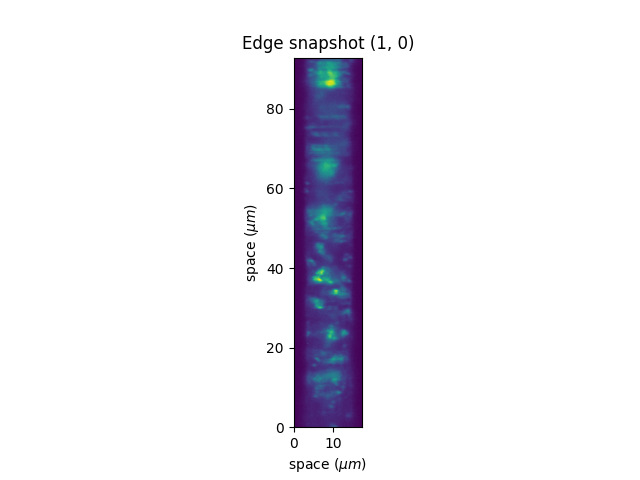

In [3]:
edge_seq = [0]

edge_objs = [edges_total[i] for i in edge_seq]

img_seq = np.arange(len(edge_objs[0].video_analysis.selection_file))

for edge in edge_objs:
    edge_pic = edge.view_edge(img_frame=40 ,save_im=True, target_length = target_length)
    edge_video = edge.view_edge(img_frame = img_seq, save_im=True, quality = 6, target_length=target_length)


100%|███████████████████████████████████████████████| 600/600 [00:32<00:00, 18.60it/s]


Saved the array
Saved the image


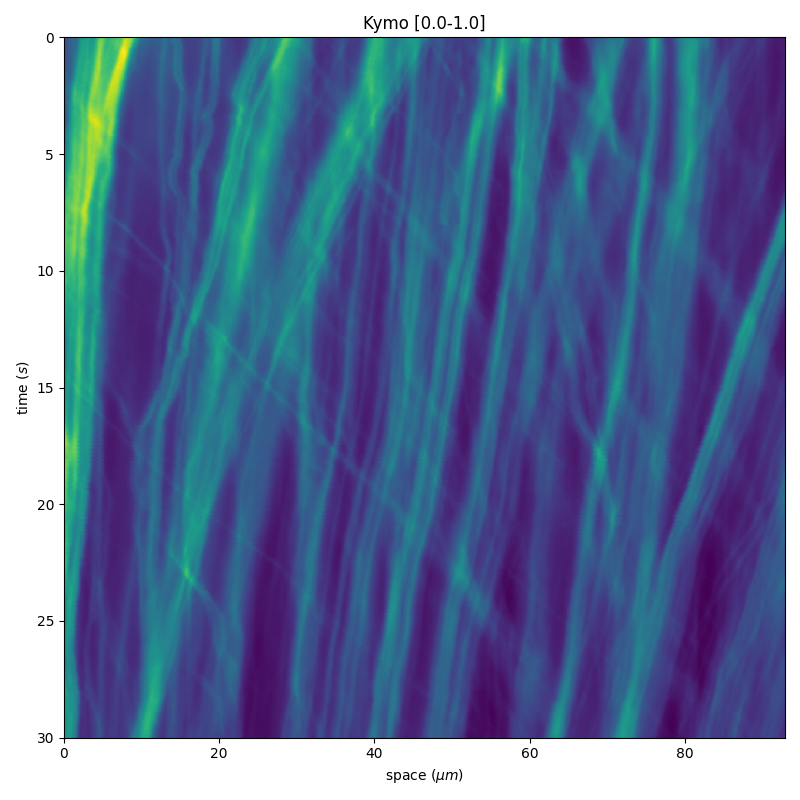

In [11]:
bin_nr = 1
kymo = [edge.extract_multi_kymo(bin_nr, target_length=target_length, plots=True) for edge in edge_objs]


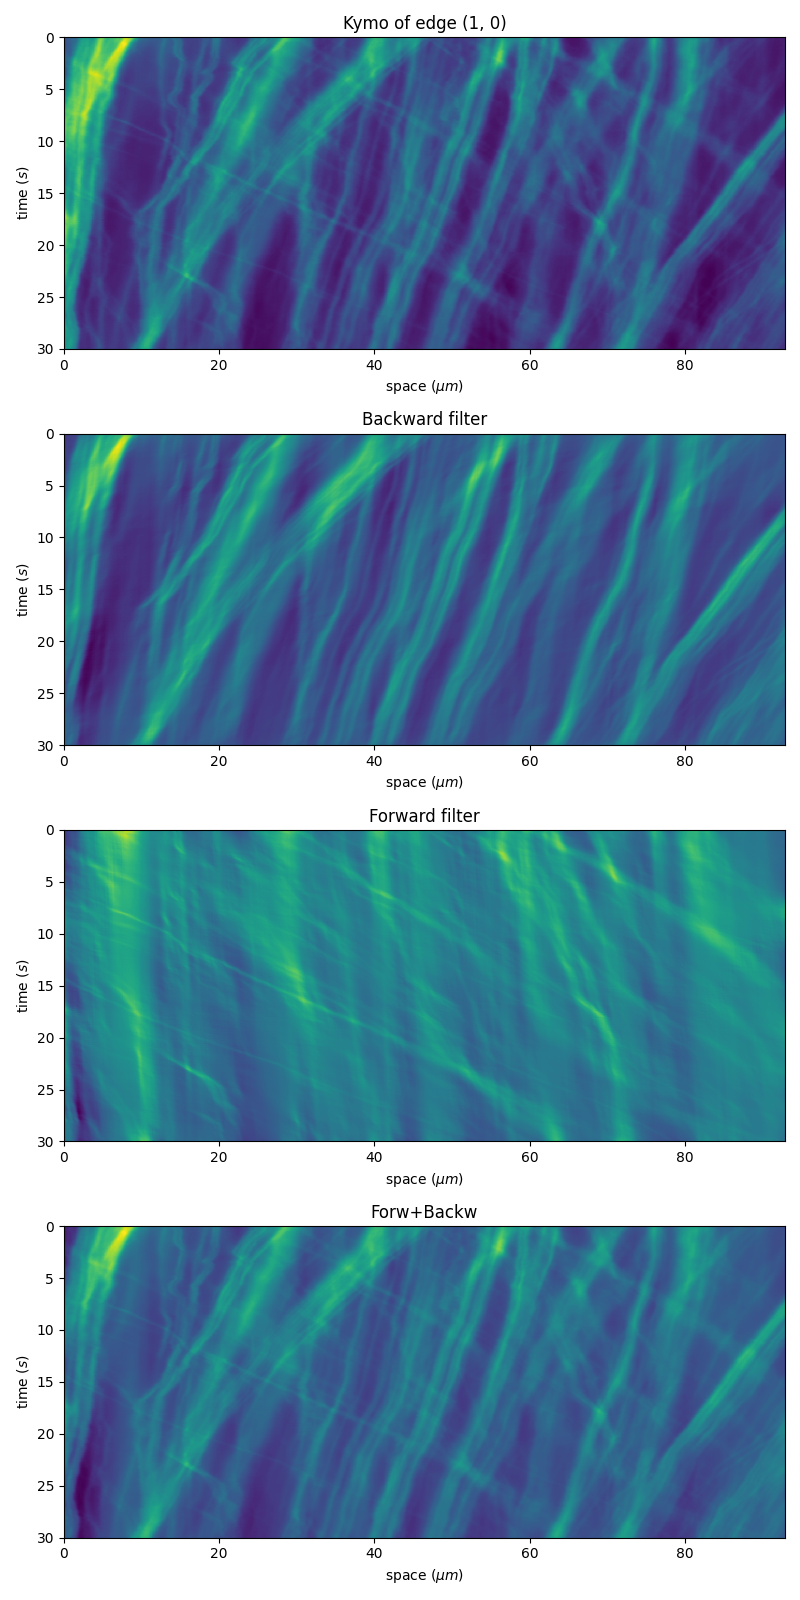

In [12]:
for j, edge_obj in enumerate(edge_objs): 
    kymos_lefts, kymos_rights = edge_objs[j].fourier_kymo(bin_nr, plots=True)
#     fig, ax = plt.subplots(4,bin_nr, figsize=(8, 12), sharey='row')
#     if bin_nr == 1:
#         for i in range(4):
#             ax[i] = [ax[i]]
#     for i in range(bin_nr):
#         ax[0][i].imshow(kymo[0][i])
#         ax[0][i].set_title(f"Kymo of edge {edge_objs[j].edge_name}")

#         ax[1][i].imshow(kymos_lefts[i])
#         ax[1][i].set_title("Backward filter")

#         ax[2][i].imshow(kymos_rights[i])
#         ax[2][i].set_title("Forward filter")

#         ax[3][i].imshow(kymos_lefts[i] + kymos_rights[i])
#         ax[3][i].set_title("Forw+Backw")
#     fig.tight_layout()


/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:543: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),
/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:567: RuntimeWarning: Mean of empty slice
  ax1[3][i].plot(np.nanmean(speed, axis=1), times[j])
/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:543: RuntimeWarning: Mean of empty slice
  np.transpose((times[j], np.nanmean(speeds[i], axis=1), edges_list, direction)),
/gpfs/home6/svstaalduine/AMF_project/amftrack/pipeline/development/high_mag_videos/kymo_class.py:567: RuntimeWarning: Mean of empty slice
  ax1[3][i].plot(np.nanmean(speed, axis=1), times[j])


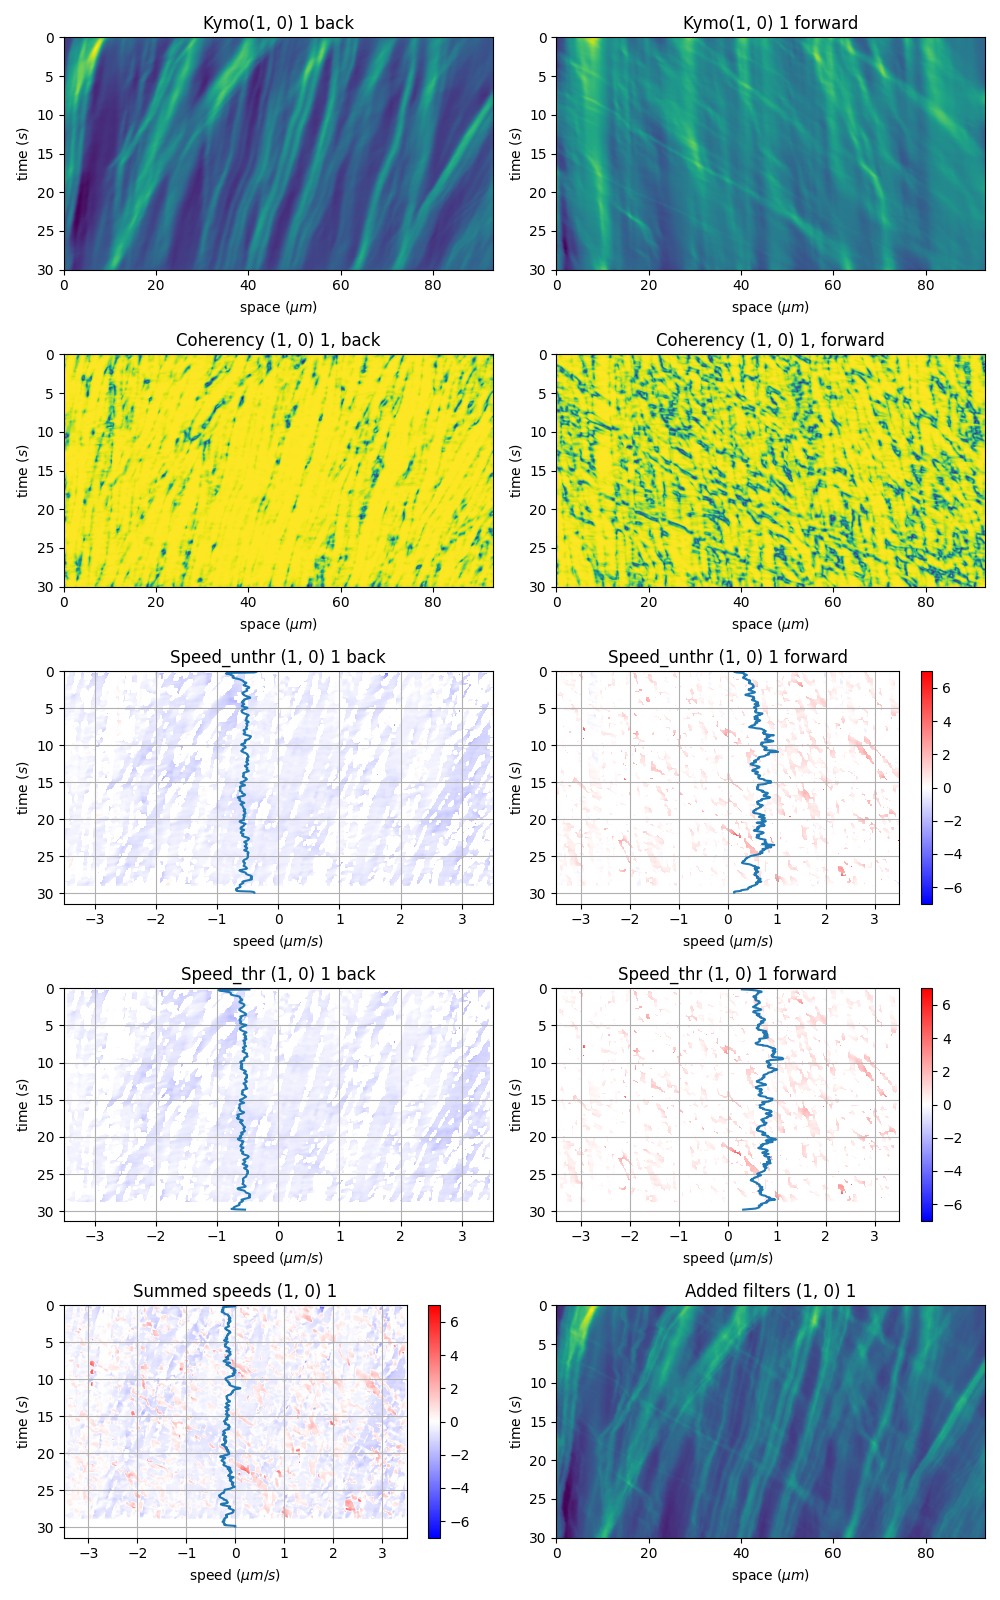

In [13]:
for i, edge in enumerate(edge_objs):
    huh = edge.extract_speeds(speed_thresh = 7.0, w=7, limit_filter=True, plots=True, speedplot=False, preblur=True, padding=0)

Loading images...


100%|██████████████████████████████████████████████| 600/600 [00:03<00:00, 197.02it/s]


Extracting edge images...


100%|███████████████████████████████████████████████| 600/600 [00:07<00:00, 78.07it/s]


Saved the filtered kymos


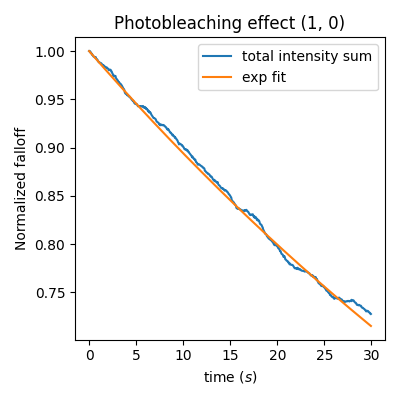

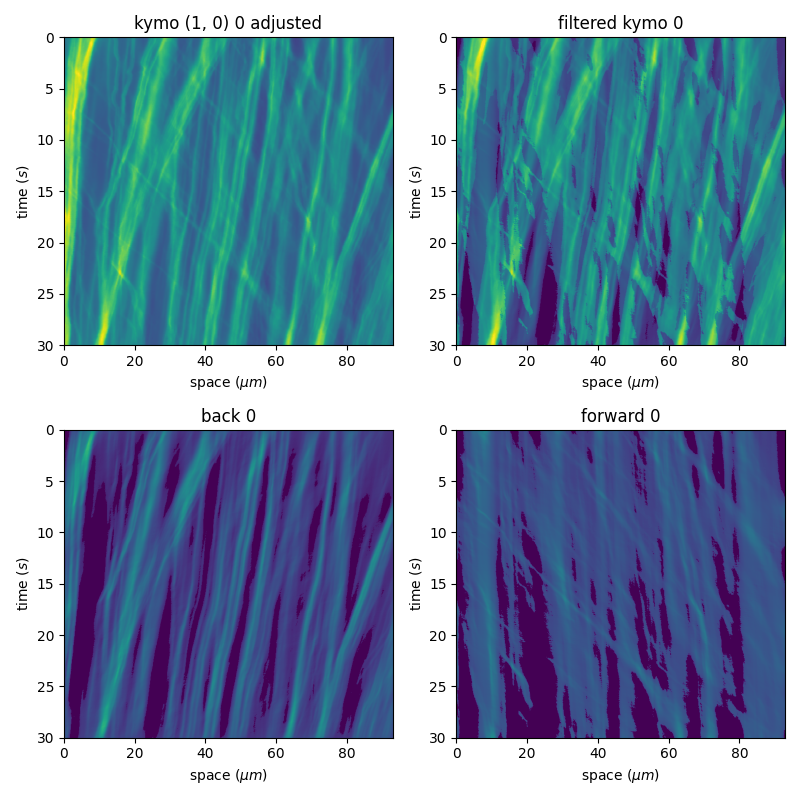

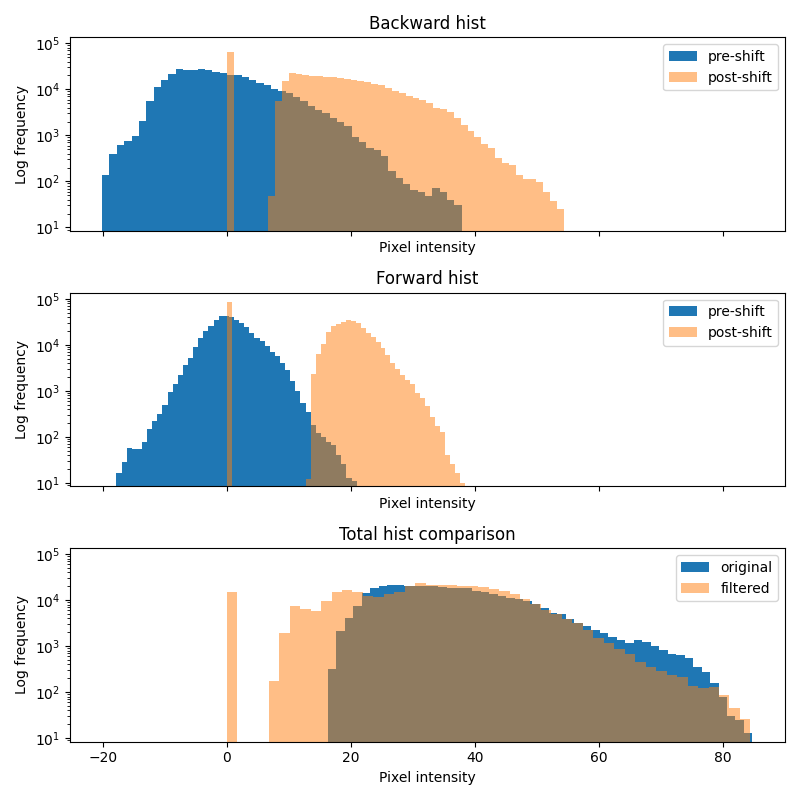

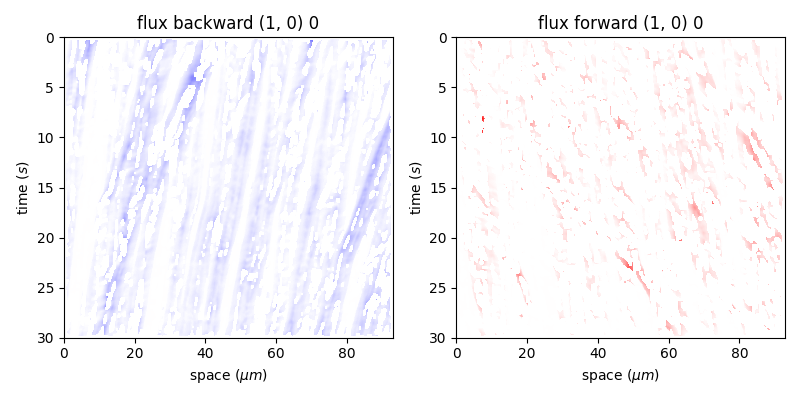

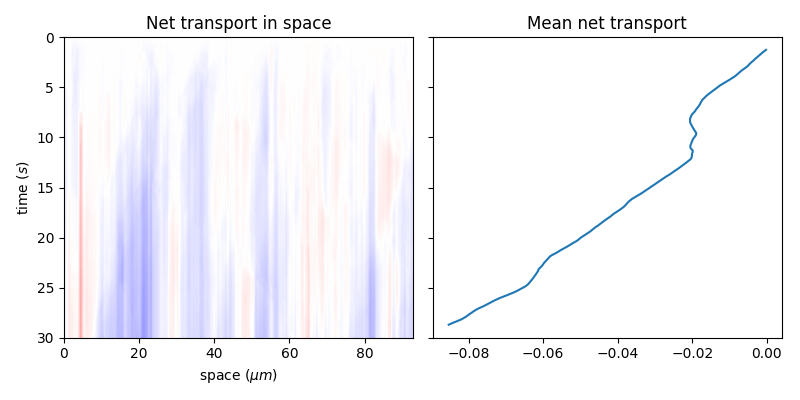

In [14]:
for i, edge in enumerate(edge_objs):
    huh = edge.extract_transport(noise_thresh=0.15, plots=True, photobleach_adjust=True)

In [15]:
# bins = 3
# bins_space = np.linspace(0, len(kymo[0][0]), bins+1, dtype=int)
# fig, ax = plt.subplots(1, bins)
# fig2, ax2 = plt.subplots(1, bins)
# kymo_means = np.percentile(kymo[1], .4, axis=0)
# kymo_normal = kymo[1] / kymo_means
# kymo_min, kymo_max = (np.min(kymo_normal), np.max(kymo_normal))
# for i in range(bins):
#     ax[i].plot(kymo_means[bins_space[i]:bins_space[i+1]])
#     ax2[i].imshow(kymo_normal.transpose()[bins_space[i]:bins_space[i+1]].transpose(), vmin=kymo_min, vmax = kymo_max)
# plt.show()

In [16]:

# fig, ax = plt.subplots(1, bins)
# for i in range(1, 30):
#     for j in range(bins):
#         corr = signal.correlate(kymo[1][0], kymo[1][bins_space[j]:bins_space[j+1]][i])
#         corr /= np.max(corr)
#         lags = signal.correlation_lags(len(kymo[0][0]), len(kymo[0][bins_space[j]:bins_space[j+1]][i]))
#         ax[j].plot(lags, corr)
# plt.show()

In [17]:
# fig, ax = plt.subplots(len(edge_objs), bin_nr, figsize=(6, 12), sharey='row')
# count = 0

# bin_space = np.linspace(0,1, bin_nr+1)

# for i in range(len(edge_objs)):
#     for j in range(bin_nr):
#         if len(edge_objs) > 1:
#             if bin_nr > 1:
#                 ax[i][j].imshow(kymo[i][j])
#                 ax[i][j].set_title(f"Kymo [{bin_space[j]}-{bin_space[j+1]}] of edge {edge_objs[i].edge_name}")
#                 ax[i][j].set_xlabel("space ($x$)")
#                 ax[i][j].set_ylabel("time ($t$)")
#             elif bin_nr == 1:
#                 ax[i].imshow(kymo[i][0])
#                 ax[i].set_title(f"Kymo of edge {edge_objs[i].edge_name}")
#                 ax[i].set_xlabel("space ($x$)")
#                 ax[i].set_ylabel("time ($t$)")
                
#         else:
#             if bin_nr == 1:
#                 ax = [ax]
#             ax[j].imshow(kymo[i][j])
#             ax[j].set_title(f"Kymo [{bin_space[j]}-{bin_space[j+1]}]")
#             ax[j].set_xlabel("space ($x$)")
#             ax[j].set_ylabel("time ($t$)")

# fig.tight_layout()
# # plt.show()